<a href="https://colab.research.google.com/github/scumpustefania16/Tema1_IA/blob/main/Tema1_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report


In [ ]:
from google.colab import files

uploaded = files.upload()   # Alege fișierul .csv din computer
filename = list(uploaded.keys())[0]
print(f"✅ Fișier încărcat: {filename}")

# Citire CSV
df = pd.read_csv(filename)
df.head()


Saving Surgical-deepnet.csv to Surgical-deepnet (1).csv
✅ Fișier încărcat: Surgical-deepnet (1).csv


,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


In [ ]:
print("Dimensiunea setului de date:", df.shape)
print("\nPrimele coloane:\n", df.columns.tolist())
print("\nValori lipsă per coloană:\n", df.isnull().sum())

# În acest dataset, coloana țintă este 'complication' (0 = fără, 1 = cu)
target_col = 'complication'

# Convertim ținta în tip int (dacă nu e deja)
df[target_col] = df[target_col].astype(int)

# Separăm X și y
X = df.drop(columns=[target_col])
y = df[target_col]

print("\n✅ Coloana țintă folosită:", target_col)
print("Distribuția valorilor țintă:")
print(y.value_counts())



Dimensiunea setului de date: (14635, 25)

Primele coloane:
 ['bmi', 'Age', 'asa_status', 'baseline_cancer', 'baseline_charlson', 'baseline_cvd', 'baseline_dementia', 'baseline_diabetes', 'baseline_digestive', 'baseline_osteoart', 'baseline_psych', 'baseline_pulmonary', 'ahrq_ccs', 'ccsComplicationRate', 'ccsMort30Rate', 'complication_rsi', 'dow', 'gender', 'hour', 'month', 'moonphase', 'mort30', 'mortality_rsi', 'race', 'complication']

Valori lipsă per coloană:
 bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30 

In [ ]:
# 4. Împărțirea în train/test + normalizare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("✅ Datele au fost scalate și împărțite corect.")


✅ Datele au fost scalate și împărțite corect.


In [ ]:
# 5. Model kNN standard (k=5)
knn_basic = KNeighborsClassifier(n_neighbors=5)
knn_basic.fit(X_train_scaled, y_train)

y_pred_basic = knn_basic.predict(X_test_scaled)

print("Acuratețe kNN (k=5):", accuracy_score(y_test, y_pred_basic))
print("\nMatrice de confuzie:\n", confusion_matrix(y_test, y_pred_basic))
print("\nRaport clasificare:\n", classification_report(y_test, y_pred_basic))


Acuratețe kNN (k=5): 0.7690625854058486

Matrice de confuzie:
 [[2443  293]
 [ 552  371]]

Raport clasificare:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      2736
           1       0.56      0.40      0.47       923

    accuracy                           0.77      3659
   macro avg       0.69      0.65      0.66      3659
weighted avg       0.75      0.77      0.76      3659



In [ ]:
# 6. Căutarea valorii optime k (CV 10-fold)
param_grid = {'n_neighbors': np.arange(1, 26)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("✅ Cel mai bun k găsit:", grid.best_params_['n_neighbors'])
print("Acuratețea medie în CV:", grid.best_score_)

# Testăm modelul optim pe test set
best_k = grid.best_params_['n_neighbors']
knn_opt = grid.best_estimator_
y_pred_opt = knn_opt.predict(X_test_scaled)

print("\nAcuratețe pe test:", accuracy_score(y_test, y_pred_opt))


✅ Cel mai bun k găsit: 25
Acuratețea medie în CV: 0.7846185905259084

Acuratețe pe test: 0.7966657556709483


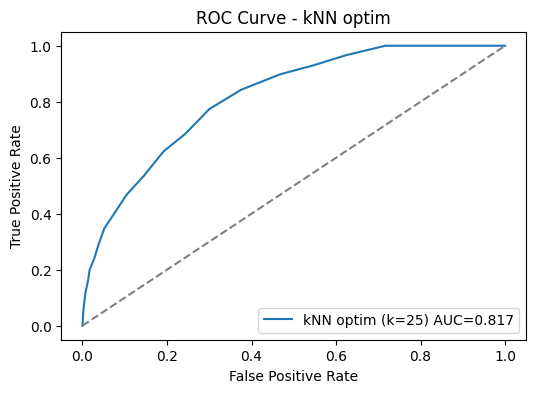

In [ ]:
# 7. ROC / AUC pentru modelul optim
y_prob_opt = knn_opt.predict_proba(X_test_scaled)[:,1]
auc_opt = roc_auc_score(y_test, y_prob_opt)

fpr, tpr, _ = roc_curve(y_test, y_prob_opt)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"kNN optim (k={best_k}) AUC={auc_opt:.3f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - kNN optim")
plt.legend()
plt.show()


Acuratețe weighted kNN: 0.797
AUC weighted kNN: 0.817


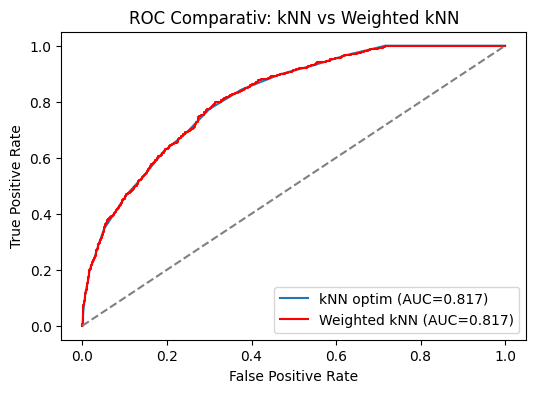

In [ ]:
# 8. Weighted kNN, metoda alternativa (1 / distanță)
knn_weighted = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn_weighted.fit(X_train_scaled, y_train)
y_pred_weighted = knn_weighted.predict(X_test_scaled)
y_prob_weighted = knn_weighted.predict_proba(X_test_scaled)[:,1]

acc_weighted = accuracy_score(y_test, y_pred_weighted)
auc_weighted = roc_auc_score(y_test, y_prob_weighted)

print(f"Acuratețe weighted kNN: {acc_weighted:.3f}")
print(f"AUC weighted kNN: {auc_weighted:.3f}")

# ROC comparativ
fpr_w, tpr_w, _ = roc_curve(y_test, y_prob_weighted)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"kNN optim (AUC={auc_opt:.3f})")
plt.plot(fpr_w, tpr_w, label=f"Weighted kNN (AUC={auc_weighted:.3f})", color='red')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Comparativ: kNN vs Weighted kNN")
plt.legend()
plt.show()


In [ ]:
# 9. Rezumat rezultate
results = pd.DataFrame({
    'Metoda': ['kNN_standard (k=5)', f'kNN_optim (k={best_k})', 'Weighted_kNN'],
    'Acuratețe': [accuracy_score(y_test, y_pred_basic),
                  accuracy_score(y_test, y_pred_opt),
                  acc_weighted],
    'AUC': [roc_auc_score(y_test, knn_basic.predict_proba(X_test_scaled)[:,1]),
            auc_opt,
            auc_weighted]
})
print("Rezumat performanță:\n")
print(results)


Rezumat performanță:

               Metoda  Acuratețe       AUC
0  kNN_standard (k=5)   0.769063  0.756191
1    kNN_optim (k=25)   0.796666  0.816504
2        Weighted_kNN   0.797212  0.816981
